In [91]:
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from prometheus_client.parser import text_string_to_metric_families
from sympy.polys.subresultants_qq_zz import pivot
from torch.fx.experimental.unification.unification_tools import first

from pcgrllm.utils.logger import text_to_html

In [92]:
load_dotenv(override=True)
csv_path = os.getenv('CSV_PATH')
csv_path

'wandb_output_2025-01-06-15-03-01.csv'

In [93]:
df = pd.read_csv(csv_path)
# df = df[df['pe'] == 'cot']
df = df[df['fewshot'] == False]
df = df[df['evaluator'] == 'hr']
df = df[df['exp_name'] != 'vision']
df = df[df['n_self_alignment'] == 0]
df = df[df['gpt_model'] == 'gpt-4o']
df = df[df['feedback_type'] == 'default']
df = df[df['Evaluation/llm_iteration'] <= 6]
df.reset_index()

,index,run_id,final_state,target_character,pe,gpt_model,branch_factor,exp_name,evaluator,total_iterations,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,0,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,...,0.011111,0.533333,0.533333,26.000002,2.566667,0.400000,0.0,0.033333,0.200000,1.000000
1,1,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,...,0.000000,0.000000,0.000000,26.000000,2.666667,0.333333,0.0,0.000000,0.166667,0.966667
2,2,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,...,0.033333,0.633333,0.600000,26.214287,2.566667,0.333333,0.0,0.100000,0.166667,0.933333
3,3,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,...,0.000000,0.600000,0.133333,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,4,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,...,0.000000,0.166667,0.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,893,01vofhsc,finished,2,cot,gpt-4o,2,def,hr,6,...,0.000000,0.483333,0.033333,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000
230,894,01vofhsc,finished,2,cot,gpt-4o,2,def,hr,6,...,0.488889,1.000000,0.916667,27.000000,0.800000,0.733333,0.0,1.466667,0.733333,0.733333
231,895,01vofhsc,finished,2,cot,gpt-4o,2,def,hr,6,...,0.577778,1.000000,0.950000,26.692308,0.400000,0.866667,0.0,1.733333,0.833333,0.866667
232,896,01vofhsc,finished,2,cot,gpt-4o,2,def,hr,6,...,0.577778,1.000000,0.966667,27.230770,0.400000,0.866667,0.0,1.733333,0.800000,0.866667


In [94]:
df.groupby(['pe', 'Evaluation/llm_iteration'])['run_id'].count()

pe   Evaluation/llm_iteration
cot  1                           10
     2                           10
     3                           10
     4                           10
     5                           10
     6                           10
got  1                           14
     2                           14
     3                           14
     4                           14
     5                           14
     6                           14
tot  1                           15
     2                           15
     3                           15
     4                           15
     5                           15
     6                           15
Name: run_id, dtype: int64

In [95]:
df

,run_id,final_state,target_character,pe,gpt_model,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,0,...,0.011111,0.533333,0.533333,26.000002,2.566667,0.400000,0.0,0.033333,0.200000,1.000000
1,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,0,...,0.000000,0.000000,0.000000,26.000000,2.666667,0.333333,0.0,0.000000,0.166667,0.966667
2,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,0,...,0.033333,0.633333,0.600000,26.214287,2.566667,0.333333,0.0,0.100000,0.166667,0.933333
3,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,0,...,0.000000,0.600000,0.133333,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,0,...,0.000000,0.166667,0.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,01vofhsc,finished,2,cot,gpt-4o,2,def,hr,6,0,...,0.000000,0.483333,0.033333,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000
894,01vofhsc,finished,2,cot,gpt-4o,2,def,hr,6,0,...,0.488889,1.000000,0.916667,27.000000,0.800000,0.733333,0.0,1.466667,0.733333,0.733333
895,01vofhsc,finished,2,cot,gpt-4o,2,def,hr,6,0,...,0.577778,1.000000,0.950000,26.692308,0.400000,0.866667,0.0,1.733333,0.833333,0.866667
896,01vofhsc,finished,2,cot,gpt-4o,2,def,hr,6,0,...,0.577778,1.000000,0.966667,27.230770,0.400000,0.866667,0.0,1.733333,0.800000,0.866667


In [96]:
df.groupby(['pe', 'Evaluation/llm_iteration'])['Evaluation/acc_imp_perc'].mean()

pe   Evaluation/llm_iteration
cot  1                           0.033333
     2                           0.006667
     3                           0.092222
     4                           0.108889
     5                           0.093333
     6                           0.155556
got  1                           0.032540
     2                           0.095238
     3                           0.053175
     4                           0.073810
     5                           0.042063
     6                           0.076190
tot  1                           0.028148
     2                           0.171852
     3                           0.259259
     4                           0.124444
     5                           0.113333
     6                           0.328889
Name: Evaluation/acc_imp_perc, dtype: float64

In [97]:
iteration_order = sorted(df['Evaluation/llm_iteration'].unique())

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))
# plt.ylim(0, 1)
# plt.xlim(1, 6)


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [98]:
order = ['cot', 'tot', 'got']
df['pe'] = pd.Categorical(df['pe'], categories=order, ordered=True)

# # 지정된 순서에 따라 정렬
df = df.sort_values(by='pe')
df

,run_id,final_state,target_character,pe,gpt_model,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,re2wd1xx,finished,1,cot,gpt-4o,2,def,hr,6,0,...,0.011111,0.533333,0.533333,26.000002,2.566667,0.400000,0.000000,0.033333,0.200000,1.000000
32,f95wbsxp,finished,2,cot,gpt-4o,2,def,hr,6,0,...,0.022222,0.766667,0.133333,26.000000,2.933333,0.000000,0.033333,0.033333,0.033333,0.033333
33,f95wbsxp,finished,2,cot,gpt-4o,2,def,hr,6,0,...,0.033333,1.000000,0.433333,26.000000,2.900000,0.000000,0.033333,0.066667,0.033333,0.033333
34,f95wbsxp,finished,2,cot,gpt-4o,2,def,hr,6,0,...,0.000000,0.250000,0.050000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35,f95wbsxp,finished,2,cot,gpt-4o,2,def,hr,6,0,...,0.000000,0.250000,0.050000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,rliizr3u,finished,2,got,gpt-4o,2,def,hr,9,0,...,0.000000,0.700000,0.116667,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
61,al39weot,finished,1,got,gpt-4o,2,def,hr,9,0,...,0.000000,0.100000,0.100000,26.068966,2.600000,0.400000,0.000000,0.000000,0.200000,0.966667
62,al39weot,finished,1,got,gpt-4o,2,def,hr,9,0,...,0.022222,0.566667,0.500000,26.230770,2.600000,0.333333,0.000000,0.066667,0.166667,0.866667
76,1mldm5mm,finished,1,got,gpt-4o,2,def,hr,9,0,...,0.011111,0.533333,0.433333,26.818182,2.833333,0.133333,0.000000,0.033333,0.066667,0.733333


0.03
0.03
0.06
0.06
0.09
0.09
0.09


/var/folders/x_/2lt9k5kn52q43m1_z0kp7tfm0000gn/T/ipykernel_40897/3854435575.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['pe'] = df['pe'].replace({
/var/folders/x_/2lt9k5kn52q43m1_z0kp7tfm0000gn/T/ipykernel_40897/3854435575.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for idx, (key, group) in enumerate(df.groupby('PE')):


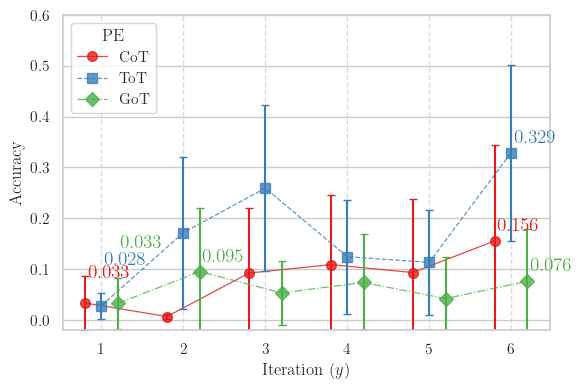

In [99]:

try:
    df['pe'] = df['pe'].replace({
        'cot': 'CoT',
        'tot': 'ToT',
        'got': 'GoT'
    })
except:
    pass
# rename column pe to PE
df = df.rename(columns={'pe': 'PE'})

# Create boxplot to show the distribution at each iteration
# sns.boxplot(
#     data=df, 
#     x='Evaluation/llm_iteration', 
#     y='Evaluation/acc_imp_perc', 
#     hue='PE', 
#     width=0.5, 
#     palette='Set2', 
#     order=iteration_order
# )

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem, t


plt.rcParams['text.usetex'] = True
plt.rc('font', family='Times New Roman')  # Windows의 경우

plt.figure(figsize=(6, 4))

# Lineplot to show trends with markers and error bars
palette = sns.color_palette('Set1')
offset = 0.2
markers = ['o', 's', 'D', '^', 'v', 'P', '*']  # Add more markers if needed
line_style = ['-', '--', '-.', ':']  # Add different line styles if needed

confidence_level = 0.95
first_iter_offset = 0
    

for idx, (key, group) in enumerate(df.groupby('PE')):
    agg_data = group.groupby('Evaluation/llm_iteration').agg(
        mean=('Evaluation/acc_imp_perc', 'mean'),
        std=('Evaluation/acc_imp_perc', 'std'),
        count=('Evaluation/acc_imp_perc', 'count')
    ).reset_index()
    agg_data['ci'] = t.ppf((1 + confidence_level) / 2, agg_data['count'] - 1) * (agg_data['std'] / np.sqrt(agg_data['count']))
    adjusted_x = agg_data['Evaluation/llm_iteration'] + (5 + idx - len(palette)/2) * offset - 0.3
    
    # Plot error bars with 95% CI
    plt.errorbar(
        adjusted_x, 
        agg_data['mean'], 
        yerr=agg_data['ci'], 
                fmt='none', 

        color=palette[idx], 
        capsize=3, 
        label=None
    )

    # Plot line with markers
    plt.plot(
        adjusted_x, 
        agg_data['mean'],
        color=palette[idx],
        linewidth=0.9,
        label=key,
        linestyle=line_style[idx % len(line_style)],
        alpha=0.8,
        marker=markers[idx % len(markers)],
        markersize=7
    )
    
    
    for i, row in agg_data.iterrows():
        if row['Evaluation/llm_iteration'] == iteration_order[0] or row['Evaluation/llm_iteration'] == iteration_order[-1] or row['mean'] == agg_data['mean'].max():
            
            if row['Evaluation/llm_iteration'] == 1:
                first_iter_offset += 0.03
            
            y_offset = 0
            if row['Evaluation/llm_iteration'] == 1:
                y_offset = first_iter_offset
            
            print(first_iter_offset)
            plt.text(
                adjusted_x[i] + 0.03, 
                row['mean'] + 0.02 + y_offset,  # Slightly above the point
                f"{row['mean']:.3f}", 
                fontsize=14, 
                fontweight='bold', 
                color=palette[idx], 
                ha='left'
            )

# Customize the plot
plt.xlabel('Iteration ($y$)')
plt.ylabel('Accuracy')
# plt.title('Accuracy Improvement vs. LLM Iteration with Boxplot and Trends')
plt.legend(title='PE', loc='upper left')
plt.tight_layout()
plt.ylim(-0.02, 0.6)
plt.grid(axis='y', linestyle='-', alpha=1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('reasoning_prompt.pdf', dpi=300)
plt.savefig('reasoning_prompt.png', dpi=300)
plt.show()

In [100]:
pivot_df = df.pivot_table(index=['PE'], columns='Evaluation/llm_iteration', values=['Evaluation/acc_imp_perc'])
pivot_df = pivot_df.reset_index()

# change first column name to PE
pivot_df.columns.name = 'PE'

# remove the first level of column index
# remove index name
pivot_df.columns.name = None

pivot_df

/var/folders/x_/2lt9k5kn52q43m1_z0kp7tfm0000gn/T/ipykernel_40897/2541258057.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index=['PE'], columns='Evaluation/llm_iteration', values=['Evaluation/acc_imp_perc'])


PE Evaluation/acc_imp_perc                      \
Evaluation/llm_iteration                            1         2         3   
0                         CoT                0.033333  0.006667  0.092222   
1                         ToT                0.028148  0.171852  0.259259   
2                         GoT                0.032540  0.095238  0.053175   

                                                        
Evaluation/llm_iteration         4         5         6  
0                         0.108889  0.093333  0.155556  
1                         0.124444  0.113333  0.328889  
2                         0.073810  0.042063  0.076190

In [101]:
def insert_str(src_str, idx, insert_str):
    # LaTeX 문자열을 줄 단위로 나눔
    lines = src_str.splitlines()
    
    # 지정된 줄 번호 뒤에 \midrule 삽입
    lines.insert(idx, insert_str)
    
    # 다시 LaTeX 문자열로 결합
    return "\n".join(lines)
from IPython.display import display, Latex

In [102]:
from IPython.core.display import Latex

tex_str = pivot_df.to_latex(buf=None, escape=True, bold_rows=False, position='!h', index=False, float_format="%.3f", multicolumn_format='c',
                            caption='Performance between reasoning-based prompt engineering', label='tab:reasoning_prompt')

tex_str = tex_str.replace('feedback_type &', 'Feedback Type &')


tex_str = tex_str.replace('\cline{1-10}\n', '')
tex_str = tex_str.replace('feedback\_type', '\\textbf{Feedback Type}')
tex_str = tex_str.replace('Specific', '\\textbf{Specific}')
tex_str = tex_str.replace('PE &', '\\textbf{PE} &')
tex_str = tex_str.replace('\multicolumn{6}{c}{Evaluation/acc\_imp\_perc}', '\multicolumn{6}{c}{Iteration ($y_{i}$)}')
tex_str = tex_str.replace('\\begin{tabular}{lrrrrrr}', '\\begin{tabular}{p{1.8cm}|rrrrrr}')

offset = 0
tex_str = insert_str(tex_str, offset + 1, "\\centering")


with open('reasoning_prompt_table.tex', 'w') as f:
    f.write(tex_str)
display(Latex(tex_str))


<IPython.core.display.Latex object>